### Import libraries

In [ ]:
! pip install torcheval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 3.8 MB/s eta 0:00:00


In [ ]:
import os
import torch
from torch import optim
# from torch.nn import MSELoss

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Deep_learning_course/Airplane_location/Two_bounding_box/src/')
from custom_load import YoloLoaderTrainEval
from fit_func import FitTrainEval
# from yolo_model import YoloModel
from yolo_model_resnet18 import YoloModel
from yolo_model_2 import Yolov1
from yolo_loss import YoloLoss
from iou_giou import intersection_over_union, generalized_intersection_over_union
from iou_compound_metric import CompoundMetric

### Import data to local path

In [ ]:
path_to_zip_folder = '/content/drive/MyDrive/Deep_learning_course/Airplane_location/data/airplanes.zip'
current_folder_path = '/content/localdata/'
!unzip -q $path_to_zip_folder -d $current_folder_path

### Define parameters

In [ ]:
# data
root_dir = '/content/drive/MyDrive/Deep_learning_course/Airplane_location/'
data_path = os.path.join(current_folder_path, 'dataset/')
batch_size = 200
# batch_size = 400
workers = 8
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
random_seed = 16
# model
grid_side = 4
number_boxes = 2
path_save = os.path.join(root_dir, 'Two_bounding_box', 'models/')
# name_load = 'yolo_model_yolo_8.pkl'
name_model = 'yolo_model_resnet_2.pkl'

In [ ]:
data_train, data_val = YoloLoaderTrainEval(
    os.path.join(current_folder_path, 'dataset/'),
    batch_size=batch_size,
    resize=(224, 224),
    grid=grid_side,
    workers=workers,
    pin_memory_device=device,
    random_seed=random_seed
)

In [ ]:
# state = torch.load(os.path.join(path_save, name_load))

In [ ]:
# model = YoloModel(grid_size=grid_side, bounding_box=number_boxes)
model = Yolov1(split_size=grid_side, num_boxes=number_boxes, num_classes=0)
# model.load_state_dict(state["model"])

In [ ]:
# model.to(device)
# model(data_train.dataset[0]['image'].unsqueeze(0).to(device)).shape

### Train the model

In [ ]:
optimizer = optim.AdamW(model.parameters(), lr=1e-4)
# loss_metric = MSELoss(reduction='sum')
loss_metric = YoloLoss(S=grid_side, B=number_boxes)

In [ ]:
iou_yolo = CompoundMetric(S=grid_side, B=number_boxes)
metrics = [iou_yolo]

In [ ]:
iou_yolo.__name__

'iou_yolo_max_box'

In [ ]:
optimization = FitTrainEval(
    model=model,
    S=grid_side,
    B=number_boxes,
    loss=loss_metric,
    optimizer=optimizer,
    metrics=metrics,
    path_save=os.path.join(path_save, name_model),
    save_best=True,
    device=device
)

In [ ]:
trained = optimization.fit_train_eval(
    epochs=200,
    data_train=data_train,
    data_eval=data_val
)

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1695.019172668457 	 Val loss: 3783.2197265625
Train iou_yolo_max_box: 1.1675942540168762 	 Val iou_yolo_max_box: 0.9714444875717163

Best metric: 0.9845023155212402
Current metric: 0.9714444875717163
Epoch time: 5.400463342666626 s
Checker: 0.9714444875717163 > 0.9845023155212402
Epoch 113/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1665.137550354004 	 Val loss: 3686.892822265625
Train iou_yolo_max_box: 1.200202852487564 	 Val iou_yolo_max_box: 0.9666930437088013

Best metric: 0.9845023155212402
Current metric: 0.9666930437088013
Epoch time: 5.286087512969971 s
Checker: 0.9666930437088013 > 0.9845023155212402
Epoch 114/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1678.9246826171875 	 Val loss: 3703.3037109375
Train iou_yolo_max_box: 1.2073149383068085 	 Val iou_yolo_max_box: 0.9664320349693298

Best metric: 0.9845023155212402
Current metric: 0.9664320349693298
Epoch time: 5.251908779144287 s
Checker: 0.9664320349693298 > 0.9845023155212402
Epoch 115/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1661.956558227539 	 Val loss: 3768.707763671875
Train iou_yolo_max_box: 1.1765541434288025 	 Val iou_yolo_max_box: 0.9564695358276367

Best metric: 0.9845023155212402
Current metric: 0.9564695358276367
Epoch time: 5.2363293170928955 s
Checker: 0.9564695358276367 > 0.9845023155212402
Epoch 116/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1632.7322616577148 	 Val loss: 3892.73681640625
Train iou_yolo_max_box: 1.218685656785965 	 Val iou_yolo_max_box: 0.9583406448364258

Best metric: 0.9845023155212402
Current metric: 0.9583406448364258
Epoch time: 5.25233793258667 s
Checker: 0.9583406448364258 > 0.9845023155212402
Epoch 117/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1638.2244186401367 	 Val loss: 3972.735595703125
Train iou_yolo_max_box: 1.200164556503296 	 Val iou_yolo_max_box: 0.957750678062439

Best metric: 0.9845023155212402
Current metric: 0.957750678062439
Epoch time: 5.282999753952026 s
Checker: 0.957750678062439 > 0.9845023155212402
Epoch 118/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1613.7398834228516 	 Val loss: 3919.42626953125
Train iou_yolo_max_box: 1.206821233034134 	 Val iou_yolo_max_box: 0.9571009874343872

Best metric: 0.9845023155212402
Current metric: 0.9571009874343872
Epoch time: 5.298846960067749 s
Checker: 0.9571009874343872 > 0.9845023155212402
Epoch 119/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1622.410659790039 	 Val loss: 3858.4345703125
Train iou_yolo_max_box: 1.1989681720733643 	 Val iou_yolo_max_box: 0.9759683609008789

Best metric: 0.9845023155212402
Current metric: 0.9759683609008789
Epoch time: 5.319077730178833 s
Checker: 0.9759683609008789 > 0.9845023155212402
Epoch 120/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1599.5900039672852 	 Val loss: 4065.95654296875
Train iou_yolo_max_box: 1.1992668807506561 	 Val iou_yolo_max_box: 0.9951063394546509

Best metric: 0.9845023155212402
Current metric: 0.9951063394546509
Epoch time: 5.392372131347656 s
Checker: 0.9951063394546509 > 0.9845023155212402
Saving model
Epoch 121/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1579.5486907958984 	 Val loss: 3765.5185546875
Train iou_yolo_max_box: 1.2217043340206146 	 Val iou_yolo_max_box: 0.9885880351066589

Best metric: 0.9951063394546509
Current metric: 0.9885880351066589
Epoch time: 5.17619252204895 s
Checker: 0.9885880351066589 > 0.9951063394546509
Epoch 122/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1569.0949935913086 	 Val loss: 3835.37353515625
Train iou_yolo_max_box: 1.2075674533843994 	 Val iou_yolo_max_box: 0.9823521971702576

Best metric: 0.9951063394546509
Current metric: 0.9823521971702576
Epoch time: 5.3930840492248535 s
Checker: 0.9823521971702576 > 0.9951063394546509
Epoch 123/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1548.3304977416992 	 Val loss: 3823.88134765625
Train iou_yolo_max_box: 1.2102256119251251 	 Val iou_yolo_max_box: 0.9729017615318298

Best metric: 0.9951063394546509
Current metric: 0.9729017615318298
Epoch time: 5.295972108840942 s
Checker: 0.9729017615318298 > 0.9951063394546509
Epoch 124/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1554.360855102539 	 Val loss: 3881.594970703125
Train iou_yolo_max_box: 1.2185909748077393 	 Val iou_yolo_max_box: 0.9631932377815247

Best metric: 0.9951063394546509
Current metric: 0.9631932377815247
Epoch time: 5.202630519866943 s
Checker: 0.9631932377815247 > 0.9951063394546509
Epoch 125/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1522.400650024414 	 Val loss: 3847.595947265625
Train iou_yolo_max_box: 1.22066530585289 	 Val iou_yolo_max_box: 0.9617636203765869

Best metric: 0.9951063394546509
Current metric: 0.9617636203765869
Epoch time: 5.3207268714904785 s
Checker: 0.9617636203765869 > 0.9951063394546509
Epoch 126/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1545.7396087646484 	 Val loss: 3770.692138671875
Train iou_yolo_max_box: 1.2305274307727814 	 Val iou_yolo_max_box: 0.9676440954208374

Best metric: 0.9951063394546509
Current metric: 0.9676440954208374
Epoch time: 5.2956459522247314 s
Checker: 0.9676440954208374 > 0.9951063394546509
Epoch 127/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1525.2862014770508 	 Val loss: 4036.54833984375
Train iou_yolo_max_box: 1.232957512140274 	 Val iou_yolo_max_box: 0.9875978827476501

Best metric: 0.9951063394546509
Current metric: 0.9875978827476501
Epoch time: 5.370448589324951 s
Checker: 0.9875978827476501 > 0.9951063394546509
Epoch 128/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1519.4754104614258 	 Val loss: 4096.91845703125
Train iou_yolo_max_box: 1.2024983167648315 	 Val iou_yolo_max_box: 0.9546777009963989

Best metric: 0.9951063394546509
Current metric: 0.9546777009963989
Epoch time: 5.231588363647461 s
Checker: 0.9546777009963989 > 0.9951063394546509
Epoch 129/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1501.031234741211 	 Val loss: 4281.37548828125
Train iou_yolo_max_box: 1.2493348121643066 	 Val iou_yolo_max_box: 0.9523745775222778

Best metric: 0.9951063394546509
Current metric: 0.9523745775222778
Epoch time: 5.2666144371032715 s
Checker: 0.9523745775222778 > 0.9951063394546509
Epoch 130/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1490.0655670166016 	 Val loss: 3872.544189453125
Train iou_yolo_max_box: 1.2178977727890015 	 Val iou_yolo_max_box: 0.9661538004875183

Best metric: 0.9951063394546509
Current metric: 0.9661538004875183
Epoch time: 5.372870683670044 s
Checker: 0.9661538004875183 > 0.9951063394546509
Epoch 131/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1472.2161483764648 	 Val loss: 3756.29296875
Train iou_yolo_max_box: 1.232294112443924 	 Val iou_yolo_max_box: 0.9701149463653564

Best metric: 0.9951063394546509
Current metric: 0.9701149463653564
Epoch time: 5.371295213699341 s
Checker: 0.9701149463653564 > 0.9951063394546509
Epoch 132/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1478.1201171875 	 Val loss: 3724.56689453125
Train iou_yolo_max_box: 1.2354989051818848 	 Val iou_yolo_max_box: 0.978763222694397

Best metric: 0.9951063394546509
Current metric: 0.978763222694397
Epoch time: 5.258279800415039 s
Checker: 0.978763222694397 > 0.9951063394546509
Epoch 133/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1456.6176223754883 	 Val loss: 3708.2138671875
Train iou_yolo_max_box: 1.2423328459262848 	 Val iou_yolo_max_box: 0.9795820713043213

Best metric: 0.9951063394546509
Current metric: 0.9795820713043213
Epoch time: 5.21916937828064 s
Checker: 0.9795820713043213 > 0.9951063394546509
Epoch 134/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1453.5416870117188 	 Val loss: 3775.628173828125
Train iou_yolo_max_box: 1.2381004095077515 	 Val iou_yolo_max_box: 0.990357518196106

Best metric: 0.9951063394546509
Current metric: 0.990357518196106
Epoch time: 5.31443977355957 s
Checker: 0.990357518196106 > 0.9951063394546509
Epoch 135/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1469.6200332641602 	 Val loss: 3763.380859375
Train iou_yolo_max_box: 1.262557715177536 	 Val iou_yolo_max_box: 0.979762613773346

Best metric: 0.9951063394546509
Current metric: 0.979762613773346
Epoch time: 5.316471099853516 s
Checker: 0.979762613773346 > 0.9951063394546509
Epoch 136/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1412.5221328735352 	 Val loss: 4332.77734375
Train iou_yolo_max_box: 1.2257624864578247 	 Val iou_yolo_max_box: 0.9902061820030212

Best metric: 0.9951063394546509
Current metric: 0.9902061820030212
Epoch time: 5.292991638183594 s
Checker: 0.9902061820030212 > 0.9951063394546509
Epoch 137/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1442.530372619629 	 Val loss: 5056.6396484375
Train iou_yolo_max_box: 1.2720630466938019 	 Val iou_yolo_max_box: 1.0078911781311035

Best metric: 0.9951063394546509
Current metric: 1.0078911781311035
Epoch time: 5.36902379989624 s
Checker: 1.0078911781311035 > 0.9951063394546509
Saving model
Epoch 138/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1446.1531372070312 	 Val loss: 4207.81298828125
Train iou_yolo_max_box: 1.2592433989048004 	 Val iou_yolo_max_box: 0.9763627648353577

Best metric: 1.0078911781311035
Current metric: 0.9763627648353577
Epoch time: 5.2895636558532715 s
Checker: 0.9763627648353577 > 1.0078911781311035
Epoch 139/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1444.1894073486328 	 Val loss: 4025.634765625
Train iou_yolo_max_box: 1.255220502614975 	 Val iou_yolo_max_box: 0.9824585914611816

Best metric: 1.0078911781311035
Current metric: 0.9824585914611816
Epoch time: 5.487418174743652 s
Checker: 0.9824585914611816 > 1.0078911781311035
Epoch 140/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1439.766944885254 	 Val loss: 4114.25927734375
Train iou_yolo_max_box: 1.2602747082710266 	 Val iou_yolo_max_box: 0.9938893914222717

Best metric: 1.0078911781311035
Current metric: 0.9938893914222717
Epoch time: 5.31402587890625 s
Checker: 0.9938893914222717 > 1.0078911781311035
Epoch 141/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1476.9267120361328 	 Val loss: 3987.99658203125
Train iou_yolo_max_box: 1.24955552816391 	 Val iou_yolo_max_box: 0.9975438117980957

Best metric: 1.0078911781311035
Current metric: 0.9975438117980957
Epoch time: 5.316838026046753 s
Checker: 0.9975438117980957 > 1.0078911781311035
Epoch 142/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1435.5920944213867 	 Val loss: 4271.08544921875
Train iou_yolo_max_box: 1.247951477766037 	 Val iou_yolo_max_box: 0.9590689539909363

Best metric: 1.0078911781311035
Current metric: 0.9590689539909363
Epoch time: 5.464470863342285 s
Checker: 0.9590689539909363 > 1.0078911781311035
Epoch 143/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1431.7904052734375 	 Val loss: 4134.1640625
Train iou_yolo_max_box: 1.2851045429706573 	 Val iou_yolo_max_box: 0.9707394242286682

Best metric: 1.0078911781311035
Current metric: 0.9707394242286682
Epoch time: 5.336788654327393 s
Checker: 0.9707394242286682 > 1.0078911781311035
Epoch 144/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1493.0738525390625 	 Val loss: 4550.58154296875
Train iou_yolo_max_box: 1.2478286921977997 	 Val iou_yolo_max_box: 0.9914082288742065

Best metric: 1.0078911781311035
Current metric: 0.9914082288742065
Epoch time: 5.406575441360474 s
Checker: 0.9914082288742065 > 1.0078911781311035
Epoch 145/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1649.19482421875 	 Val loss: 4323.7607421875
Train iou_yolo_max_box: 1.2681234776973724 	 Val iou_yolo_max_box: 0.9666637182235718

Best metric: 1.0078911781311035
Current metric: 0.9666637182235718
Epoch time: 5.353250026702881 s
Checker: 0.9666637182235718 > 1.0078911781311035
Epoch 146/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 2631.4779510498047 	 Val loss: 3986.083251953125
Train iou_yolo_max_box: 1.09195077419281 	 Val iou_yolo_max_box: 0.989518940448761

Best metric: 1.0078911781311035
Current metric: 0.989518940448761
Epoch time: 5.315968990325928 s
Checker: 0.989518940448761 > 1.0078911781311035
Epoch 147/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 2567.4976959228516 	 Val loss: 5046.23388671875
Train iou_yolo_max_box: 1.1122760772705078 	 Val iou_yolo_max_box: 0.9423816800117493

Best metric: 1.0078911781311035
Current metric: 0.9423816800117493
Epoch time: 5.488156318664551 s
Checker: 0.9423816800117493 > 1.0078911781311035
Epoch 148/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 2101.7069549560547 	 Val loss: 4445.0966796875
Train iou_yolo_max_box: 1.1619847416877747 	 Val iou_yolo_max_box: 1.0287092924118042

Best metric: 1.0078911781311035
Current metric: 1.0287092924118042
Epoch time: 5.345100402832031 s
Checker: 1.0287092924118042 > 1.0078911781311035
Saving model
Epoch 149/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 2015.2609558105469 	 Val loss: 4665.0625
Train iou_yolo_max_box: 1.1978045403957367 	 Val iou_yolo_max_box: 0.9758909940719604

Best metric: 1.0287092924118042
Current metric: 0.9758909940719604
Epoch time: 5.286511421203613 s
Checker: 0.9758909940719604 > 1.0287092924118042
Epoch 150/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1887.5611877441406 	 Val loss: 4460.8046875
Train iou_yolo_max_box: 1.2038918435573578 	 Val iou_yolo_max_box: 0.9767237305641174

Best metric: 1.0287092924118042
Current metric: 0.9767237305641174
Epoch time: 5.286106824874878 s
Checker: 0.9767237305641174 > 1.0287092924118042
Epoch 151/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1854.8892364501953 	 Val loss: 4617.64208984375
Train iou_yolo_max_box: 1.235544890165329 	 Val iou_yolo_max_box: 0.9710009694099426

Best metric: 1.0287092924118042
Current metric: 0.9710009694099426
Epoch time: 5.503032445907593 s
Checker: 0.9710009694099426 > 1.0287092924118042
Epoch 152/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1620.3714141845703 	 Val loss: 4341.9462890625
Train iou_yolo_max_box: 1.2647069692611694 	 Val iou_yolo_max_box: 1.0093470811843872

Best metric: 1.0287092924118042
Current metric: 1.0093470811843872
Epoch time: 5.289059162139893 s
Checker: 1.0093470811843872 > 1.0287092924118042
Epoch 153/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1555.825912475586 	 Val loss: 5021.06689453125
Train iou_yolo_max_box: 1.2787589728832245 	 Val iou_yolo_max_box: 0.9560709595680237

Best metric: 1.0287092924118042
Current metric: 0.9560709595680237
Epoch time: 5.282883644104004 s
Checker: 0.9560709595680237 > 1.0287092924118042
Epoch 154/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1533.609977722168 	 Val loss: 4514.07080078125
Train iou_yolo_max_box: 1.2911351919174194 	 Val iou_yolo_max_box: 1.0014262199401855

Best metric: 1.0287092924118042
Current metric: 1.0014262199401855
Epoch time: 5.48388147354126 s
Checker: 1.0014262199401855 > 1.0287092924118042
Epoch 155/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1512.0816802978516 	 Val loss: 4253.6884765625
Train iou_yolo_max_box: 1.2749068439006805 	 Val iou_yolo_max_box: 1.0091749429702759

Best metric: 1.0287092924118042
Current metric: 1.0091749429702759
Epoch time: 5.32835578918457 s
Checker: 1.0091749429702759 > 1.0287092924118042
Epoch 156/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1456.4678192138672 	 Val loss: 3971.82080078125
Train iou_yolo_max_box: 1.354951411485672 	 Val iou_yolo_max_box: 1.0316425561904907

Best metric: 1.0287092924118042
Current metric: 1.0316425561904907
Epoch time: 5.4338812828063965 s
Checker: 1.0316425561904907 > 1.0287092924118042
Saving model
Epoch 157/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1351.0934219360352 	 Val loss: 4034.259521484375
Train iou_yolo_max_box: 1.278388649225235 	 Val iou_yolo_max_box: 1.0194531679153442

Best metric: 1.0316425561904907
Current metric: 1.0194531679153442
Epoch time: 5.329394340515137 s
Checker: 1.0194531679153442 > 1.0316425561904907
Epoch 158/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1292.6551055908203 	 Val loss: 4135.8564453125
Train iou_yolo_max_box: 1.3009511232376099 	 Val iou_yolo_max_box: 1.014859914779663

Best metric: 1.0316425561904907
Current metric: 1.014859914779663
Epoch time: 5.40940260887146 s
Checker: 1.014859914779663 > 1.0316425561904907
Epoch 159/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1294.194107055664 	 Val loss: 4086.34375
Train iou_yolo_max_box: 1.35151407122612 	 Val iou_yolo_max_box: 1.0088818073272705

Best metric: 1.0316425561904907
Current metric: 1.0088818073272705
Epoch time: 5.301254510879517 s
Checker: 1.0088818073272705 > 1.0316425561904907
Epoch 160/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1254.7822799682617 	 Val loss: 4221.85888671875
Train iou_yolo_max_box: 1.288242131471634 	 Val iou_yolo_max_box: 1.0200421810150146

Best metric: 1.0316425561904907
Current metric: 1.0200421810150146
Epoch time: 5.200280427932739 s
Checker: 1.0200421810150146 > 1.0316425561904907
Epoch 161/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1240.8264465332031 	 Val loss: 3945.3916015625
Train iou_yolo_max_box: 1.3651166260242462 	 Val iou_yolo_max_box: 1.0240731239318848

Best metric: 1.0316425561904907
Current metric: 1.0240731239318848
Epoch time: 5.284961223602295 s
Checker: 1.0240731239318848 > 1.0316425561904907
Epoch 162/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1211.4183654785156 	 Val loss: 3981.955322265625
Train iou_yolo_max_box: 1.3358310163021088 	 Val iou_yolo_max_box: 1.0249089002609253

Best metric: 1.0316425561904907
Current metric: 1.0249089002609253
Epoch time: 5.385725736618042 s
Checker: 1.0249089002609253 > 1.0316425561904907
Epoch 163/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1209.2876052856445 	 Val loss: 3928.145263671875
Train iou_yolo_max_box: 1.3559050261974335 	 Val iou_yolo_max_box: 1.022571325302124

Best metric: 1.0316425561904907
Current metric: 1.022571325302124
Epoch time: 5.313451528549194 s
Checker: 1.022571325302124 > 1.0316425561904907
Epoch 164/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1185.0662841796875 	 Val loss: 4058.914794921875
Train iou_yolo_max_box: 1.3301973044872284 	 Val iou_yolo_max_box: 1.0334240198135376

Best metric: 1.0316425561904907
Current metric: 1.0334240198135376
Epoch time: 5.267684698104858 s
Checker: 1.0334240198135376 > 1.0316425561904907
Saving model
Epoch 165/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1155.1601791381836 	 Val loss: 4023.353515625
Train iou_yolo_max_box: 1.3913549482822418 	 Val iou_yolo_max_box: 1.02851140499115

Best metric: 1.0334240198135376
Current metric: 1.02851140499115
Epoch time: 5.360931634902954 s
Checker: 1.02851140499115 > 1.0334240198135376
Epoch 166/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1167.840950012207 	 Val loss: 4043.097412109375
Train iou_yolo_max_box: 1.3461109101772308 	 Val iou_yolo_max_box: 1.0261149406433105

Best metric: 1.0334240198135376
Current metric: 1.0261149406433105
Epoch time: 5.331523656845093 s
Checker: 1.0261149406433105 > 1.0334240198135376
Epoch 167/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1140.8048400878906 	 Val loss: 4087.697998046875
Train iou_yolo_max_box: 1.3838416039943695 	 Val iou_yolo_max_box: 1.0248756408691406

Best metric: 1.0334240198135376
Current metric: 1.0248756408691406
Epoch time: 5.291686058044434 s
Checker: 1.0248756408691406 > 1.0334240198135376
Epoch 168/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1120.277732849121 	 Val loss: 4048.882568359375
Train iou_yolo_max_box: 1.3585814833641052 	 Val iou_yolo_max_box: 1.0348305702209473

Best metric: 1.0334240198135376
Current metric: 1.0348305702209473
Epoch time: 5.381492376327515 s
Checker: 1.0348305702209473 > 1.0334240198135376
Saving model
Epoch 169/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1124.3611679077148 	 Val loss: 3986.14892578125
Train iou_yolo_max_box: 1.399940937757492 	 Val iou_yolo_max_box: 1.046290397644043

Best metric: 1.0348305702209473
Current metric: 1.046290397644043
Epoch time: 5.378561019897461 s
Checker: 1.046290397644043 > 1.0348305702209473
Saving model
Epoch 170/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1098.4852828979492 	 Val loss: 4050.447998046875
Train iou_yolo_max_box: 1.3932839035987854 	 Val iou_yolo_max_box: 1.051748275756836

Best metric: 1.046290397644043
Current metric: 1.051748275756836
Epoch time: 5.3489344120025635 s
Checker: 1.051748275756836 > 1.046290397644043
Saving model
Epoch 171/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1077.4788208007812 	 Val loss: 4005.886962890625
Train iou_yolo_max_box: 1.3762758672237396 	 Val iou_yolo_max_box: 1.044501543045044

Best metric: 1.051748275756836
Current metric: 1.044501543045044
Epoch time: 5.289795398712158 s
Checker: 1.044501543045044 > 1.051748275756836
Epoch 172/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1071.9898681640625 	 Val loss: 4097.189453125
Train iou_yolo_max_box: 1.393430233001709 	 Val iou_yolo_max_box: 1.0432926416397095

Best metric: 1.051748275756836
Current metric: 1.0432926416397095
Epoch time: 5.366365432739258 s
Checker: 1.0432926416397095 > 1.051748275756836
Epoch 173/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1118.396499633789 	 Val loss: 3926.516357421875
Train iou_yolo_max_box: 1.3774236142635345 	 Val iou_yolo_max_box: 1.0331404209136963

Best metric: 1.051748275756836
Current metric: 1.0331404209136963
Epoch time: 5.379315614700317 s
Checker: 1.0331404209136963 > 1.051748275756836
Epoch 174/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1057.6797103881836 	 Val loss: 3963.943359375
Train iou_yolo_max_box: 1.3792491257190704 	 Val iou_yolo_max_box: 1.0340229272842407

Best metric: 1.051748275756836
Current metric: 1.0340229272842407
Epoch time: 5.444396018981934 s
Checker: 1.0340229272842407 > 1.051748275756836
Epoch 175/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1069.9030838012695 	 Val loss: 3936.364990234375
Train iou_yolo_max_box: 1.4184024631977081 	 Val iou_yolo_max_box: 1.0279821157455444

Best metric: 1.051748275756836
Current metric: 1.0279821157455444
Epoch time: 5.356079816818237 s
Checker: 1.0279821157455444 > 1.051748275756836
Epoch 176/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1019.5892333984375 	 Val loss: 4075.321533203125
Train iou_yolo_max_box: 1.3829865157604218 	 Val iou_yolo_max_box: 1.0223839282989502

Best metric: 1.051748275756836
Current metric: 1.0223839282989502
Epoch time: 5.372064828872681 s
Checker: 1.0223839282989502 > 1.051748275756836
Epoch 177/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1017.8095245361328 	 Val loss: 4164.56103515625
Train iou_yolo_max_box: 1.4183830320835114 	 Val iou_yolo_max_box: 1.0240721702575684

Best metric: 1.051748275756836
Current metric: 1.0240721702575684
Epoch time: 5.336621999740601 s
Checker: 1.0240721702575684 > 1.051748275756836
Epoch 178/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1023.1678237915039 	 Val loss: 4096.12451171875
Train iou_yolo_max_box: 1.3925063908100128 	 Val iou_yolo_max_box: 1.0314738750457764

Best metric: 1.051748275756836
Current metric: 1.0314738750457764
Epoch time: 5.305836200714111 s
Checker: 1.0314738750457764 > 1.051748275756836
Epoch 179/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 1010.953857421875 	 Val loss: 4069.9248046875
Train iou_yolo_max_box: 1.4016012847423553 	 Val iou_yolo_max_box: 1.0377286672592163

Best metric: 1.051748275756836
Current metric: 1.0377286672592163
Epoch time: 5.4770543575286865 s
Checker: 1.0377286672592163 > 1.051748275756836
Epoch 180/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 989.7369232177734 	 Val loss: 4169.208984375
Train iou_yolo_max_box: 1.4403840899467468 	 Val iou_yolo_max_box: 1.0455244779586792

Best metric: 1.051748275756836
Current metric: 1.0455244779586792
Epoch time: 5.282448053359985 s
Checker: 1.0455244779586792 > 1.051748275756836
Epoch 181/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 970.0254364013672 	 Val loss: 4228.3896484375
Train iou_yolo_max_box: 1.4384767413139343 	 Val iou_yolo_max_box: 1.042547345161438

Best metric: 1.051748275756836
Current metric: 1.042547345161438
Epoch time: 5.36136269569397 s
Checker: 1.042547345161438 > 1.051748275756836
Epoch 182/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 953.6438980102539 	 Val loss: 4312.37451171875
Train iou_yolo_max_box: 1.413873165845871 	 Val iou_yolo_max_box: 1.0525044202804565

Best metric: 1.051748275756836
Current metric: 1.0525044202804565
Epoch time: 5.311604738235474 s
Checker: 1.0525044202804565 > 1.051748275756836
Saving model
Epoch 183/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 961.6699829101562 	 Val loss: 4209.31494140625
Train iou_yolo_max_box: 1.4358154833316803 	 Val iou_yolo_max_box: 1.0508015155792236

Best metric: 1.0525044202804565
Current metric: 1.0508015155792236
Epoch time: 5.350843191146851 s
Checker: 1.0508015155792236 > 1.0525044202804565
Epoch 184/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 963.6550140380859 	 Val loss: 4362.1630859375
Train iou_yolo_max_box: 1.4482264518737793 	 Val iou_yolo_max_box: 1.0702707767486572

Best metric: 1.0525044202804565
Current metric: 1.0702707767486572
Epoch time: 5.210375785827637 s
Checker: 1.0702707767486572 > 1.0525044202804565
Saving model
Epoch 185/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 981.3917541503906 	 Val loss: 4306.8916015625
Train iou_yolo_max_box: 1.3987935483455658 	 Val iou_yolo_max_box: 1.0733126401901245

Best metric: 1.0702707767486572
Current metric: 1.0733126401901245
Epoch time: 5.3309385776519775 s
Checker: 1.0733126401901245 > 1.0702707767486572
Saving model
Epoch 186/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 925.9076042175293 	 Val loss: 4434.4443359375
Train iou_yolo_max_box: 1.4549900889396667 	 Val iou_yolo_max_box: 1.0579774379730225

Best metric: 1.0733126401901245
Current metric: 1.0579774379730225
Epoch time: 5.355471849441528 s
Checker: 1.0579774379730225 > 1.0733126401901245
Epoch 187/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 902.0072937011719 	 Val loss: 4453.81884765625
Train iou_yolo_max_box: 1.4246970117092133 	 Val iou_yolo_max_box: 1.0584179162979126

Best metric: 1.0733126401901245
Current metric: 1.0584179162979126
Epoch time: 5.329559564590454 s
Checker: 1.0584179162979126 > 1.0733126401901245
Epoch 188/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 888.6495742797852 	 Val loss: 4361.49560546875
Train iou_yolo_max_box: 1.4475862979888916 	 Val iou_yolo_max_box: 1.066615104675293

Best metric: 1.0733126401901245
Current metric: 1.066615104675293
Epoch time: 5.317139625549316 s
Checker: 1.066615104675293 > 1.0733126401901245
Epoch 189/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 900.2447662353516 	 Val loss: 4377.3408203125
Train iou_yolo_max_box: 1.4374027848243713 	 Val iou_yolo_max_box: 1.0703991651535034

Best metric: 1.0733126401901245
Current metric: 1.0703991651535034
Epoch time: 5.474375247955322 s
Checker: 1.0703991651535034 > 1.0733126401901245
Epoch 190/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 906.2930755615234 	 Val loss: 4474.91259765625
Train iou_yolo_max_box: 1.4514794051647186 	 Val iou_yolo_max_box: 1.063860535621643

Best metric: 1.0733126401901245
Current metric: 1.063860535621643
Epoch time: 5.484509229660034 s
Checker: 1.063860535621643 > 1.0733126401901245
Epoch 191/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 856.0253143310547 	 Val loss: 4579.58056640625
Train iou_yolo_max_box: 1.469181478023529 	 Val iou_yolo_max_box: 1.0674757957458496

Best metric: 1.0733126401901245
Current metric: 1.0674757957458496
Epoch time: 5.4399824142456055 s
Checker: 1.0674757957458496 > 1.0733126401901245
Epoch 192/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 908.5494537353516 	 Val loss: 4329.06884765625
Train iou_yolo_max_box: 1.4581822454929352 	 Val iou_yolo_max_box: 1.0735949277877808

Best metric: 1.0733126401901245
Current metric: 1.0735949277877808
Epoch time: 5.282463073730469 s
Checker: 1.0735949277877808 > 1.0733126401901245
Saving model
Epoch 193/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 843.9244346618652 	 Val loss: 4403.71826171875
Train iou_yolo_max_box: 1.4481086432933807 	 Val iou_yolo_max_box: 1.075132966041565

Best metric: 1.0735949277877808
Current metric: 1.075132966041565
Epoch time: 5.281695127487183 s
Checker: 1.075132966041565 > 1.0735949277877808
Saving model
Epoch 194/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 836.6456146240234 	 Val loss: 4309.82373046875
Train iou_yolo_max_box: 1.4769408106803894 	 Val iou_yolo_max_box: 1.0794199705123901

Best metric: 1.075132966041565
Current metric: 1.0794199705123901
Epoch time: 5.3517725467681885 s
Checker: 1.0794199705123901 > 1.075132966041565
Saving model
Epoch 195/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 823.048152923584 	 Val loss: 4285.43603515625
Train iou_yolo_max_box: 1.468539446592331 	 Val iou_yolo_max_box: 1.0729899406433105

Best metric: 1.0794199705123901
Current metric: 1.0729899406433105
Epoch time: 5.347589731216431 s
Checker: 1.0729899406433105 > 1.0794199705123901
Epoch 196/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 827.3375282287598 	 Val loss: 4258.66259765625
Train iou_yolo_max_box: 1.4638809561729431 	 Val iou_yolo_max_box: 1.088082194328308

Best metric: 1.0794199705123901
Current metric: 1.088082194328308
Epoch time: 5.288799285888672 s
Checker: 1.088082194328308 > 1.0794199705123901
Saving model
Epoch 197/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 810.526180267334 	 Val loss: 4230.685546875
Train iou_yolo_max_box: 1.5041540563106537 	 Val iou_yolo_max_box: 1.093642234802246

Best metric: 1.088082194328308
Current metric: 1.093642234802246
Epoch time: 5.302233457565308 s
Checker: 1.093642234802246 > 1.088082194328308
Saving model
Epoch 198/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 804.2006034851074 	 Val loss: 4228.736328125
Train iou_yolo_max_box: 1.4730876684188843 	 Val iou_yolo_max_box: 1.082006573677063

Best metric: 1.093642234802246
Current metric: 1.082006573677063
Epoch time: 5.37929105758667 s
Checker: 1.082006573677063 > 1.093642234802246
Epoch 199/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 834.9229125976562 	 Val loss: 4243.32177734375
Train iou_yolo_max_box: 1.454081803560257 	 Val iou_yolo_max_box: 1.0910555124282837

Best metric: 1.093642234802246
Current metric: 1.0910555124282837
Epoch time: 5.259934186935425 s
Checker: 1.0910555124282837 > 1.093642234802246
Epoch 200/200
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Evaluating


  0%|          | 0/1 [00:00<?, ?it/s]

Train loss: 806.8822288513184 	 Val loss: 4227.83056640625
Train iou_yolo_max_box: 1.5134429037570953 	 Val iou_yolo_max_box: 1.089981198310852

Best metric: 1.093642234802246
Current metric: 1.089981198310852
Epoch time: 5.36607027053833 s
Checker: 1.089981198310852 > 1.093642234802246


In [ ]:
trained.history.keys()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
trained.history['metric'].keys()

dict_keys(['iou_yolo_max_box'])

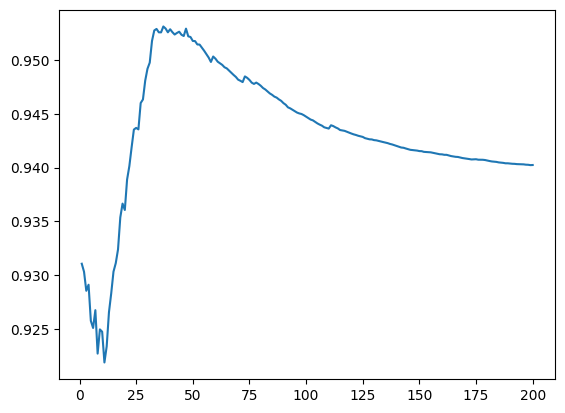

In [ ]:
plt.plot(trained.history['val_metric']['iou_yolo_max_box'])